In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src import *
from src.visualization.missing import *

# Exercice

## Impact of imputation

- Generate two 2D datasets : on with uncorrelated variables, and one correlated variables.

- For each previous dataset, create three additionnal datasets by removing values according to each type of missingness.

- Compare and comment the difference of data distribution without and with missing values.

- Apply various imputation techniques and compare the results with the initial data distribution.

# Uncorrelated

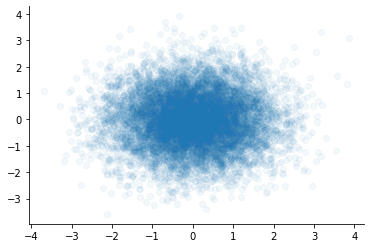

In [ ]:
np.random.seed(100)
uncorrelated = np.random.normal(size=(10000, 2))
plt.scatter(*uncorrelated.T, alpha=0.05);

## NMR

In this situation, we simulate a situation where the second column has 50% chance to be missing if the value is above 1.5.
Under this situation we can see how the distribution of the second variable is modified.
We also observe how imputing, for example by the value 0, changes even more the distribution.

Shift in mean related to nmr
-0.00710305172338271 -0.08031214119360894


/mnt/c/Users/christophe_goudet/Documents/dev/esilv/src/visualization/missing.py:21: RuntimeWarning: Mean of empty slice.
  rms = rms[rms > 0].mean()
/mnt/c/Users/christophe_goudet/Documents/dev/esilv/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


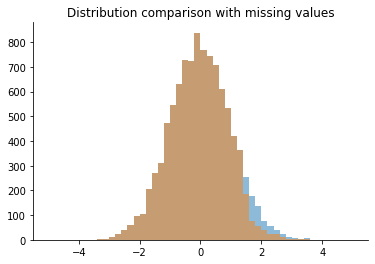

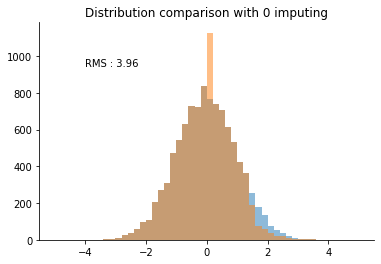

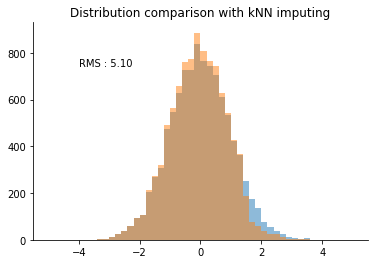

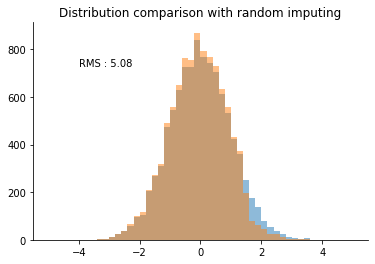

In [ ]:
compare_missing_values(uncorrelated, 'nmr')

Now we compare the initial distribution with the one with imputed 0.
Here, we can observe that all missing data points on the right tail are all accumulated on the 0 value.
As a result, the mean of the distribution is further pushed toward negative values.
Analyst must keep in mind this effect with this imputation.

We will now focus on the knn imputation technique.
In order to fill a missing value, the algorithm will find the data points with the closest first column value and average the second column value.
We can see that all missing values seem to proportionnaly distributed over all the distribution (exept the morst extreme right tail).
Indeed, the first column values are totally independent of the second values.
The KNN algorithm has then no indication to properly predict the missing values.
As a result, they are filled with relatively random variables of mean 0.

When looking at the quality of imputation, we observe that imputing with 0 value actually gives better results.
Similarly, we can see that the KNN imputing has basically the same performances than a random filling with the same distribution.

## MAR

In this situation, we simulate values missing at random and explore how the two imputation values impact the final distribution.
Because the missing values depend on the values of the first column, and that the first and second columns are independent, MAR missing values are equivalent to MCAR.
That's exactly what we see in the first figure : missing data seem to be proportionnaly missing over all distribution.
Furhtermore, we don't have anymore a shift in the mean of the distribution.

Again, we observe that, as expected, filling with a 0 value does not bring back the initial distribution.
However, with the KNN algorithm, we retrieve something roughly similar as the initial distribution.
Imputations are spread all other the distribution so it seems that the algorithm is working.

However, the results seem only good because of the structure of the problem.
In reality, the imputation values are meaningless.
Because the two columns are independent, using the first column to predict the second will only generate random numbers, with the same distribution as the second column.
So imputing with the same distribution gives back globally the right distribution.
Indeed, we observe that the KNN or randoim imputation both give worse performance than a 0 imputing, which in this case is comparable to mean imputing.

Shift in mean related to nmr
-0.00710305172338271 -0.00800006461577191


/mnt/c/Users/christophe_goudet/Documents/dev/esilv/src/visualization/missing.py:21: RuntimeWarning: Mean of empty slice.
  rms = rms[rms > 0].mean()
/mnt/c/Users/christophe_goudet/Documents/dev/esilv/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


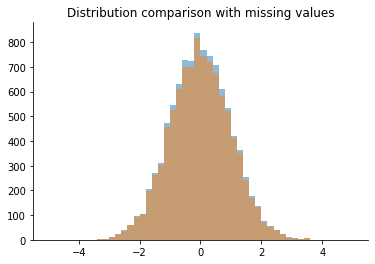

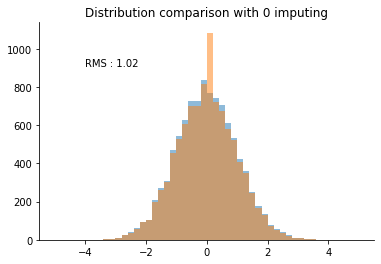

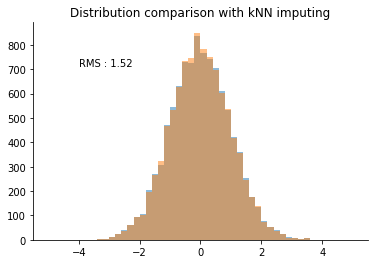

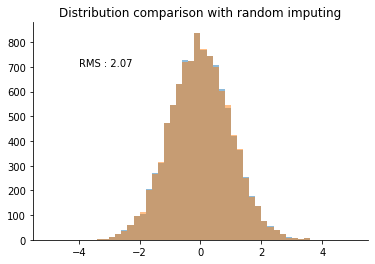

In [ ]:
compare_missing_values(uncorrelated, 'mar')

## MCAR

In the case of MCAR missing values, there is no particular reason for the data to be missing.
Because the first column has no can not help us to determine the missing values. 
Applying KNN is rather similar than random imputing.
This is what we observe from the following visualisations.

Shift in mean related to nmr
-0.00710305172338271 -0.01777878517800628


/mnt/c/Users/christophe_goudet/Documents/dev/esilv/src/visualization/missing.py:21: RuntimeWarning: Mean of empty slice.
  rms = rms[rms > 0].mean()
/mnt/c/Users/christophe_goudet/Documents/dev/esilv/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


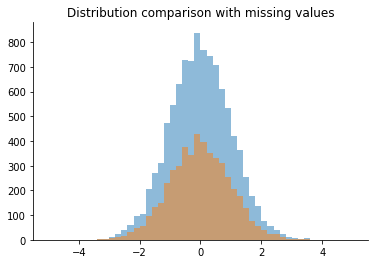

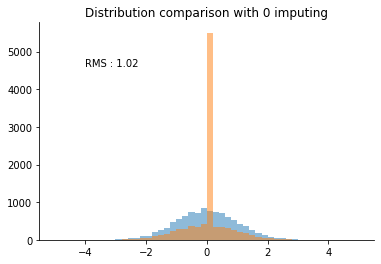

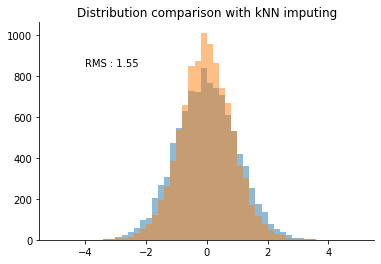

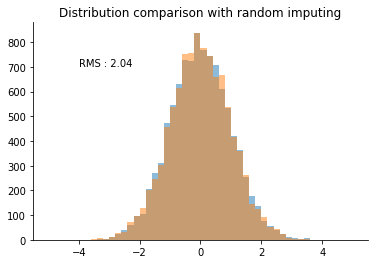

In [ ]:
compare_missing_values(uncorrelated, 'mcar')

# Correlated

In this exercice, we create a simple synthetic dataset with a linear correlation between the two features.
Given this correlation, the first column should now allows for a meaningful KNN imputation.

In [ ]:
corr_theta = 40*np.pi/180
corr = [[1, 0.7], [0.7, 1]] 
print(corr)

correlated = np.random.multivariate_normal([0, 0], cov=corr, size=1000)

[[1, 0.7], [0.7, 1]]


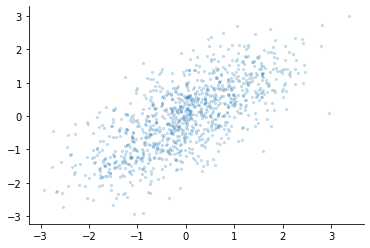

In [ ]:
fig, ax = plt.subplots()
ax.scatter(correlated[:,0], correlated[:,1], alpha=0.2, s=5);

### NMR

The case of NMR, we can see that the KNN imputing method gives significantly better results than the random one.
It is also visible on the histogram, as the impute values seem to all be on the right of the distribution.
Thanks to the correlation, the imputer can roughly estimate the value of the missing value.
With an even stronger correlation, the quality of the imputation would be even better.

Shift in mean related to nmr
-0.014635382784728264 -0.08849994658421732


/mnt/c/Users/christophe_goudet/Documents/dev/esilv/src/visualization/missing.py:21: RuntimeWarning: Mean of empty slice.
  rms = rms[rms > 0].mean()
/mnt/c/Users/christophe_goudet/Documents/dev/esilv/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


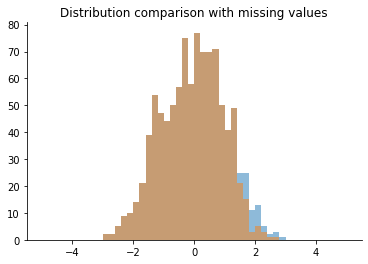

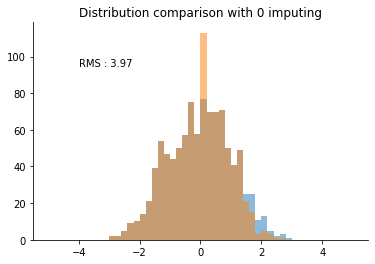

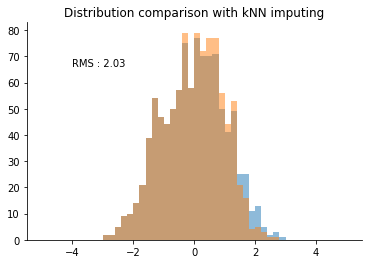

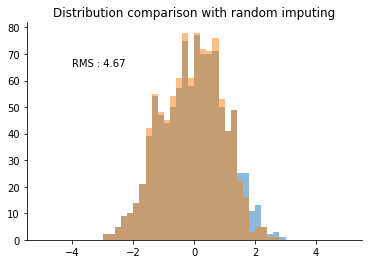

In [ ]:
compare_missing_values(correlated, 'nmr')

### MAR

In the case of MAR values, the situation before any imputation is different from the case of uncorrelated data.
Here, we have 50% chance to have a missing value if the first columns has a value above 1.5.
But because there is a strong correlation between the two columns, this means that large values of the second column have more chance to be missing that low values.
This is what we observe in the first graph where all missing values tend to be on the right of the distribution.

Then, similarly to the previous case, the KNN algorithm can leverage the correlation to estimate the missing values, which gives good results.
It is important to notice that the algorithm works because the condition for missing values was probabilistic.
If we had 100% chance to have a missing value for the first column above 1.5, then very large values of the first column would always be absent.
As a result, KNN would find only middle values of the first column to try to predict the second.
Finally, the algorithm would only predict middle values for the second column, leading to worse results.

Shift in mean related to nmr
-0.014635382784728264 -0.0703545152632984


/mnt/c/Users/christophe_goudet/Documents/dev/esilv/src/visualization/missing.py:21: RuntimeWarning: Mean of empty slice.
  rms = rms[rms > 0].mean()
/mnt/c/Users/christophe_goudet/Documents/dev/esilv/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


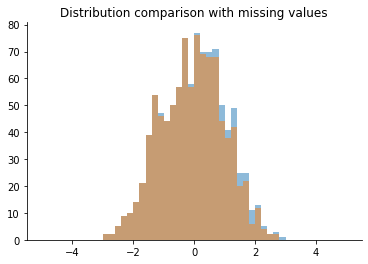

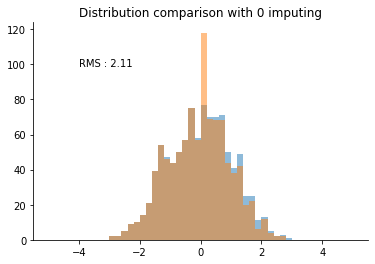

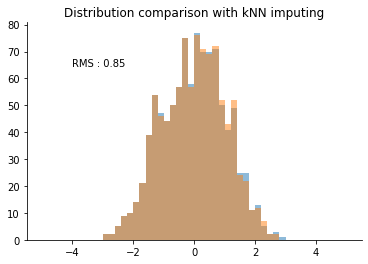

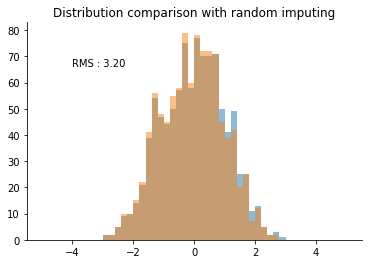

In [ ]:
compare_missing_values(correlated, 'mar')

### MCAR

This situation is basically similar to the previous one.
Because of the correlation, KNN is able to estimate the missing values.

Shift in mean related to nmr
-0.014635382784728264 0.0092817207434467


/mnt/c/Users/christophe_goudet/Documents/dev/esilv/src/visualization/missing.py:21: RuntimeWarning: Mean of empty slice.
  rms = rms[rms > 0].mean()
/mnt/c/Users/christophe_goudet/Documents/dev/esilv/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


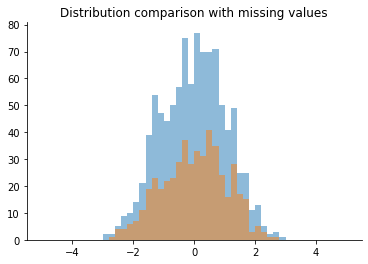

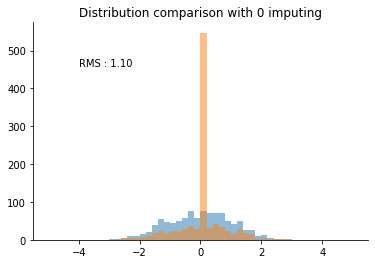

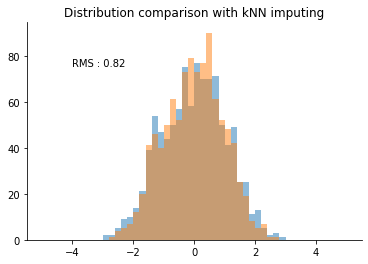

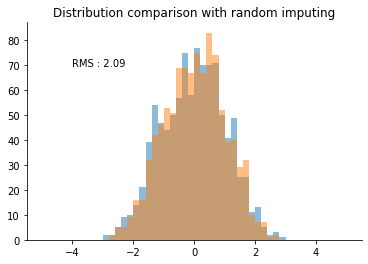

In [ ]:
compare_missing_values(correlated, 'mcar')

# Conclusion

In this set of exercices, we have observed that imputation of missing values requires to have an understanding of the context of the data in order to make proper decision.
We have seen that applying advanced multivariate techniques, such as KNN, in the case of uncorrelated variables is roughly equivalent to a random filling.
Arbitrary imputation is then the best solution, even more if can find a more meaningfull imputation than the mean.
In case of correlated variables however, multivariate techniques can help in imputing missing values.
The analyst must still be aware of possible biases that may arise depending on the type of missingness.